In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
import scipy.interpolate as sci

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: Diego Felipe Diaz Perez
---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y encuentre $f'(\pi/8)$ variando el $h$ y encuentre el error de convergencia, comparando su respuesta con el valor exacto.

* Determine $f''(\pi/8)$ con $h = 0.05$ y encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?



In [ ]:
def five_point_derivative(f,x,h):
  if len(x)<5:
    return print("deben haber minimo cinco puntos")
  df=np.zeros_like(x)
  for i in range(0,len(x)):
    if i==0 or i==1:
      df[i]=(-25*f(x[i])+48*f(x[i+1])-36*f(x[i+2])+16*f(x[i+3])-3*f(x[i+4]))/(12*h)
    elif i==len(x)-2 or i==len(x)-1:
      df[i]=(25*f(x[i])-48*f(x[i-1])+36*f(x[i-2])-16*f(x[i-3])+3*f(x[i-4]))/(12*h)
    else:
      df[i]=(f(x[i-2])-8*f(x[i-1])+8*f(x[i+1])-f(x[i+2]))/(12*h)
  return df
#a
f=lambda x: np.cos(x)
fp=lambda x: -np.sin(x)
x=np.linspace(0,2*np.pi,10)
df_h1= five_point_derivative(f,x,0.62)
cubh1= sci.CubicSpline(x,df_h1)
df_h2= five_point_derivative(f,x,0.1)
cubh2= sci.CubicSpline(x,df_h2)
df_h3= five_point_derivative(f,x,0.05)
cubh3= sci.CubicSpline(x,df_h3)
df_h4= five_point_derivative(f,x,0.01)
cubh4= sci.CubicSpline(x,df_h4)
errh1= abs((fp(np.pi/8)-cubh1(np.pi/8))/fp(np.pi/8))*100
errh2= abs((fp(np.pi/8)-cubh2(np.pi/8))/fp(np.pi/8))*100
errh3= abs((fp(np.pi/8)-cubh3(np.pi/8))/fp(np.pi/8))*100
errh4= abs((fp(np.pi/8)-cubh4(np.pi/8))/fp(np.pi/8))*100
print("error para h=0.5:",errh1,"%")
print("error para h=0.1:",errh2,"%")
print("error para h=0.05:",errh3,"%")
print("error para h=0.01:",errh4,"%")

error para h=0.5: 1.5545824022056474 %
error para h=0.1: 510.36158910632514 %
error para h=0.05: 1120.7231782126505 %
error para h=0.01: 6003.6158910632485 %


In [ ]:
#b
d2f=lambda x: -np.cos(x)
x=np.linspace(0,2*np.pi,10)
fp=lambda x: -np.sin(x)
df2=five_point_derivative(fp,x,0.5)
cubdf2=sci.CubicSpline(x,df2)
errdf2=abs((cubdf2(np.pi/8)-d2f(np.pi/8))/d2f(np.pi/8))*100
print("error para f''(π/8):",errdf2,"%")
# dado que tomamos 10 puntos la distancia del intervalo es 0.62 por lo que ese es el h optimo y por ende deberiamos aunmentar el h para una mejor aproximacion

error para f''(π/8): 41.73675784717326 %


#2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`. Realice un gráfico logaritmico de los errores.

*   ¿Cuál será el valor óptimo de $h$?

In [ ]:
#a
def diferencias_finitas(f,x,h):
  fp = np.zeros_like(x)
  for i in range(len(x)):
    if i == 0:
      fp[i] = (f(x[i+1])-f(x[i]))/h
    elif i == len(x)-1:
      fp[i] = (f(x[i])-f(x[i-1]))/h
    else:
      fp[i] = (f(x[i+1])-f(x[i-1]))/(2*h)
  return fp
f= lambda x: x*np.exp(x)
df= lambda x: np.exp(x)+x*np.exp(x)
x=np.linspace(1.8,2.2,6)
fp= diferencias_finitas(f,x,0.07)
cubfp= sci.CubicSpline(x,fp)
fpp= diferencias_finitas(df,x,0.07)
cubfpp= sci.CubicSpline(x,fpp)
print("f'(2)=",cubfp(2))
print("f''(2)=",cubfpp(2))

f'(2)= 25.37043874084843
f''(2)= 33.822384213343746


2.663098718256777


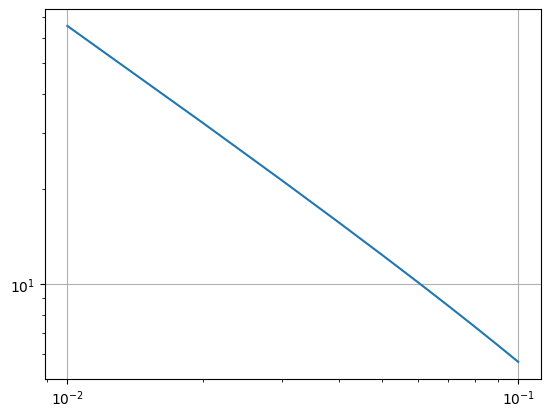

In [ ]:
#b
f= lambda x: x*np.exp(x)
x=np.linspace(1.8,2.2,6)
h=np.linspace(0.1,0.01,10)
y=np.zeros_like(x)
for i in range(0,len(x)):
  y[i]=f(x[i])
gra=np.gradient(y,0.667,edge_order=2)
cubg=sci.CubicSpline(x,gra)
r=cubg(2)
err=[]
for i in h:
  fpri=diferencias_finitas(f,x,i)
  cub=sci.CubicSpline(x,fpri)
  e=abs((cub(2)-r)/r)
  err.append(e)
plt.loglog(h,err)
plt.grid()
print(r)
#al parcecer el valor optimo de h es el mas grande que en este caso es h=0.1